# Netflix Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


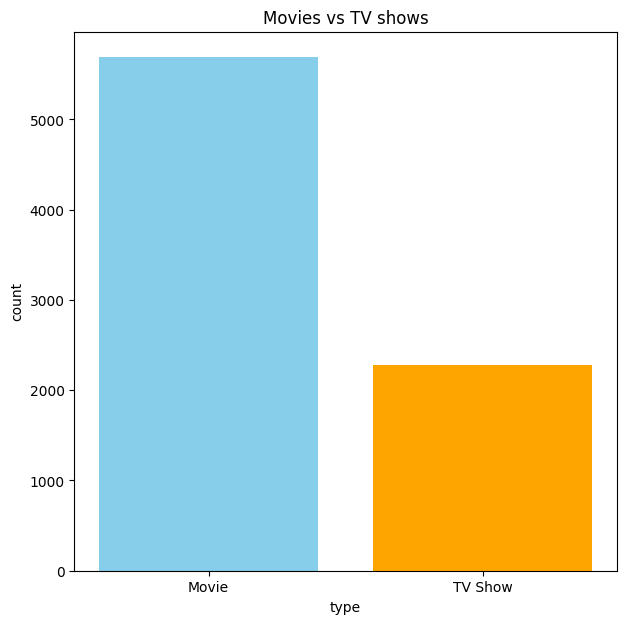

In [4]:
#Q1.How many Movies vs TV shows?

type_counts = df['type'].value_counts()
type_counts
plt.figure(figsize=(7,7))
plt.bar(type_counts.index,type_counts.values,color =['skyblue','orange'])
plt.title("Movies vs TV shows")
plt.xlabel("type")
plt.ylabel("count")
plt.savefig('Movies vs TV shows')

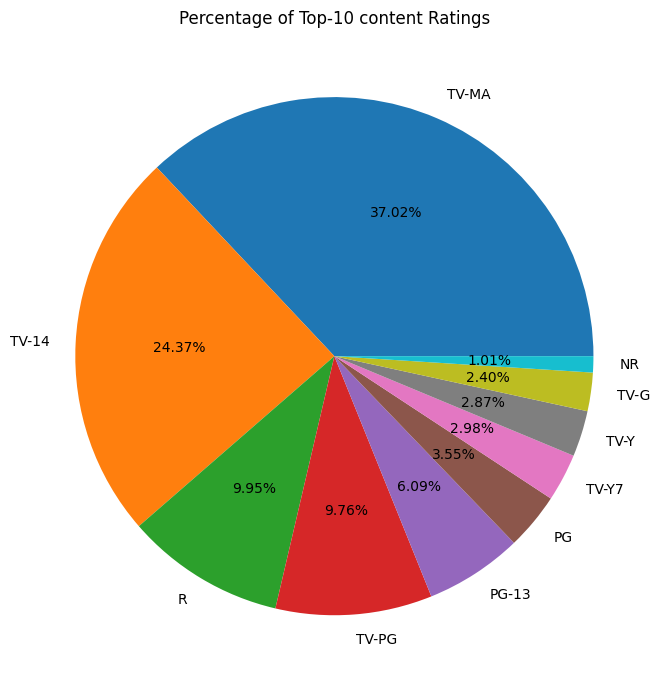

In [5]:
#Q2.What is the percentage of each content rating (PG,R,...)

rating_counts = df['rating'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(rating_counts.values,labels=rating_counts.index,autopct='%1.2f%%')
plt.title("Percentage of Top-10 content Ratings")
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

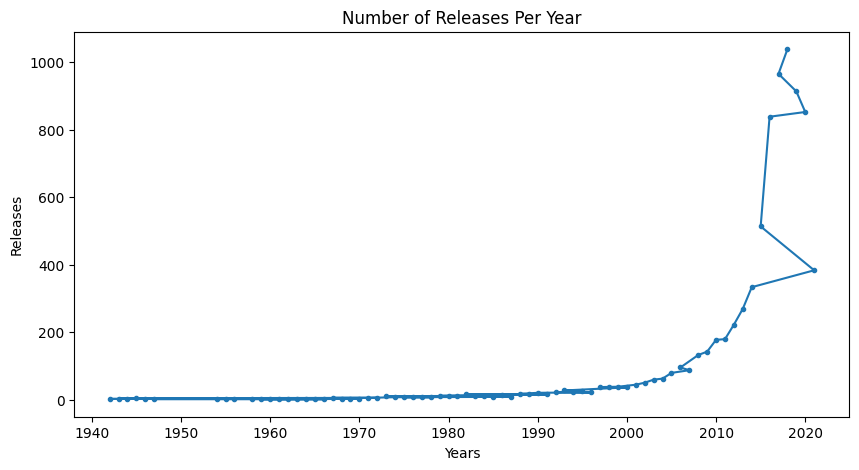

In [6]:
#Q3.How has the number of releases changed over the years?

release_per_years = df['release_year'].value_counts()
plt.figure(figsize=(10,5))
plt.plot(release_per_years.index,release_per_years.values,  marker='o',markersize=3)
plt.title("Number of Releases Per Year")
plt.xlabel('Years')
plt.ylabel('Releases')
plt.savefig('Number_of_Releases_Per_Year.png')
plt.show()

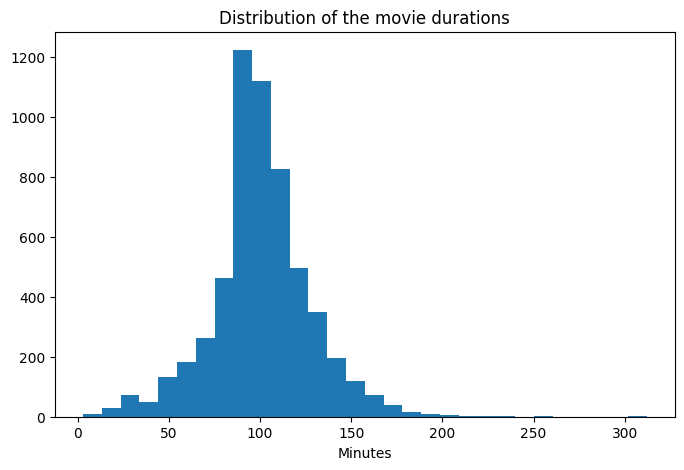

In [7]:
#Q4.What is the distribution of the movie durations?

movies = df[df['type'] == 'Movie'].copy()
movies.insert(10, 'duration_int', movies['duration'].str.replace(" min", "").astype(int))
plt.figure(figsize=(8,5))
plt.hist(movies['duration_int'],bins=30  )
plt.title("Distribution of the movie durations")
plt.xlabel("Minutes")
plt.savefig("Distribution_of_the_movie_durations.png")
plt.show()




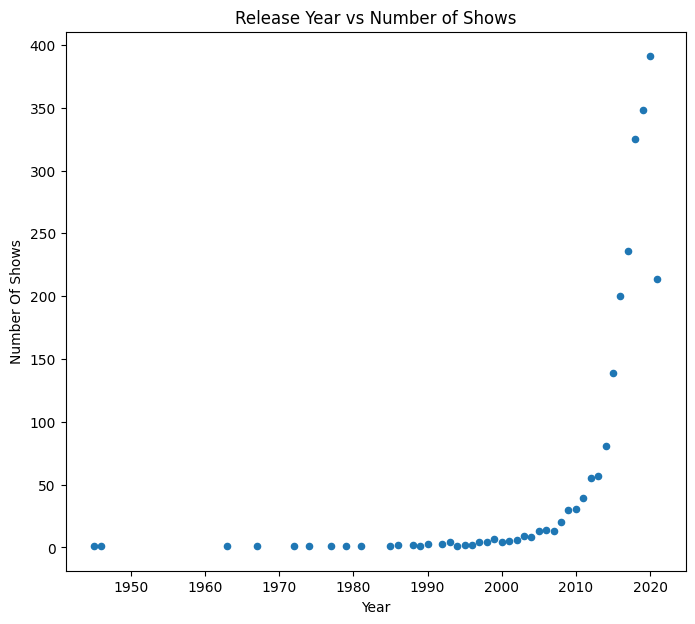

In [8]:
#Q5.Relationship b/w release year and no.of shows
shows = df[df['type'] == 'TV Show'].copy()
shows_per_year = shows["release_year"].value_counts()
plt.figure(figsize=(8,7))
plt.scatter(x = shows_per_year.index,y=shows_per_year.values,s=20)
plt.title("Release Year vs Number of Shows")
plt.xlabel("Year")
plt.ylabel("Number Of Shows")
plt.savefig("Release_Year_vs_Number_of_Shows.png")
plt.show()
# plt.yticks(np.arange(0, shows_per_year.values.max() + 1, step=25))
# plt.xticks(np.arange(1940, shows_per_year.index.max() + 5, step=5))

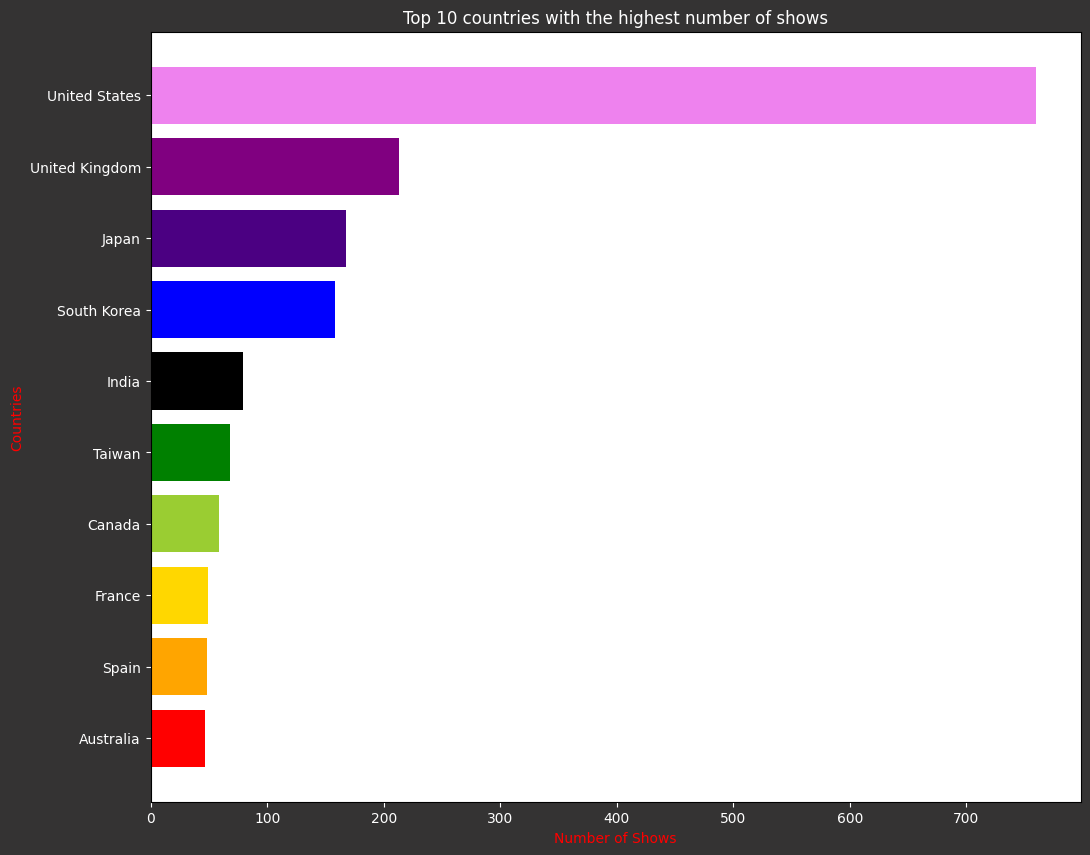

In [9]:
#Q6.Top 10 countries with the highest number of shows?

tv_shows = df[df["type"]=="TV Show"]
country_count = tv_shows["country"].value_counts().head(10).sort_values()
colors = ['red', 'orange', 'gold', 'yellowgreen', 'green', 'black', 'blue', 'indigo', 'purple', 'violet']
plt.figure(facecolor="#313030fb",figsize=(12,10))
plt.barh(country_count.index, country_count.values,color=colors)
plt.tick_params(colors='white')
plt.title("Top 10 countries with the highest number of shows",color='white')
plt.xlabel("Number of Shows",color="red")
plt.ylabel("Countries",color="red")
plt.savefig("Top_10_countries_with_the_highest_number_of_shows.png")

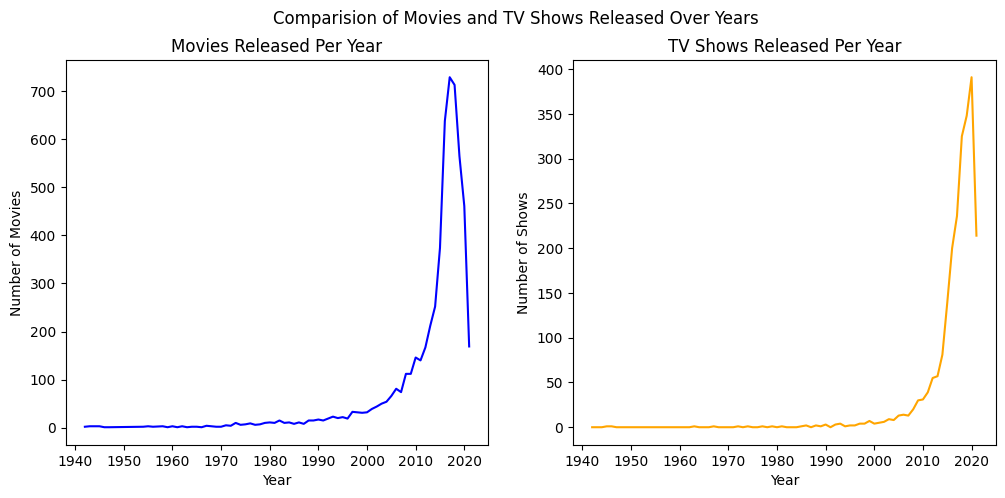

In [10]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize=(12,5))
#first subplot:movies
ax[0].plot(content_by_year. index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot:TV Shows
ax[1].plot(content_by_year. index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Shows')

fig.suptitle("Comparision of Movies and TV Shows Released Over Years")
plt.savefig("Comparision_movies_shows.png")